# AI Project: Customer Booking Forecast


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import random
import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


## Data Preprocessing

In [ ]:
# Check data columns and shape
print(df.columns)
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')
The dataset has 50000 rows and 14 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

💡 About the Dataset

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

In [ ]:
# Stastic summary of the dataset
df.describe().style.background_gradient(cmap="Blues")

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.044560,9.066340,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.887670,5.412660,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
# Check for null values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [ ]:
# Check for duplicates
dup_vals = df.duplicated().sum()
print(f'There are {dup_vals} duplicate values in the dataset')

There are 719 duplicate values in the dataset


In [ ]:
#Drop the duplicates from the dataset
df.drop_duplicates(inplace=True)
df.shape

(49281, 14)

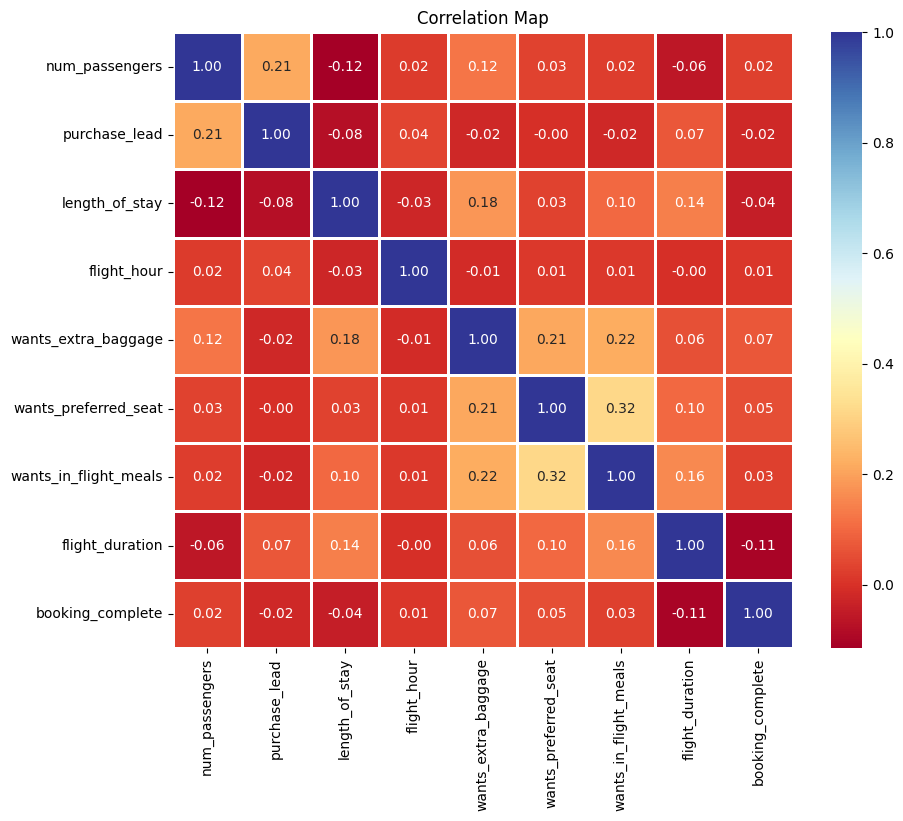

In [ ]:
# Plot the correlation map
numeric_df = df.select_dtypes(include=[float, int])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="RdYlBu", fmt='.2f',
            annot_kws=None,
            linewidths=1,
            )
plt.title("Correlation Map")
plt.show()

🔎 Dataset Insight:

- `Data Size`: The dataset has 49281 rows and 14 columns
- `Data Types`: There are features of type int64, float64, object and binary
- There are no missing values in the dataset
- `Unique Values`: There are varies but we can know the unique value in **flight_day** at the first glance to process.
- `Statistical Summary`: The statistical summary of the dataset shows that there are potential outliers or anomalies in the dataset.
- `Irrelavant Features`: The dataset has 14 features, but it seem like all the features are important and useful for the evaluation.

## EDA

<Figure size 1600x800 with 0 Axes>

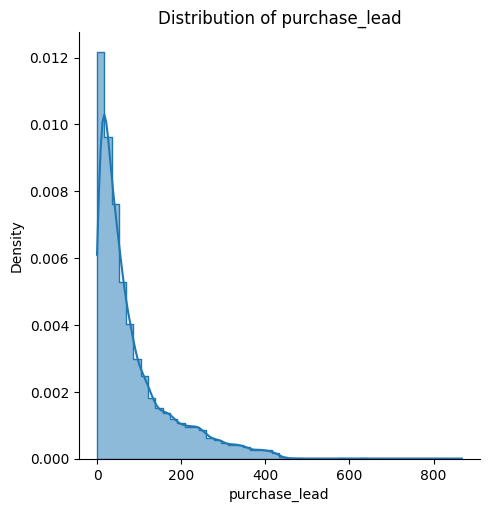

In [ ]:
# Distribution of the number of passengers travelling
plt.figure(figsize=(16, 8))
sns.displot(df['purchase_lead'], stat='density', kind='hist', kde=True, bins=50,
            element='step', fill=True)
plt.title("Distribution of purchase_lead")
plt.show()

In [ ]:
# Function to generate random colors
def generate_random_colors(n):
    return ['#' + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in range(n)]

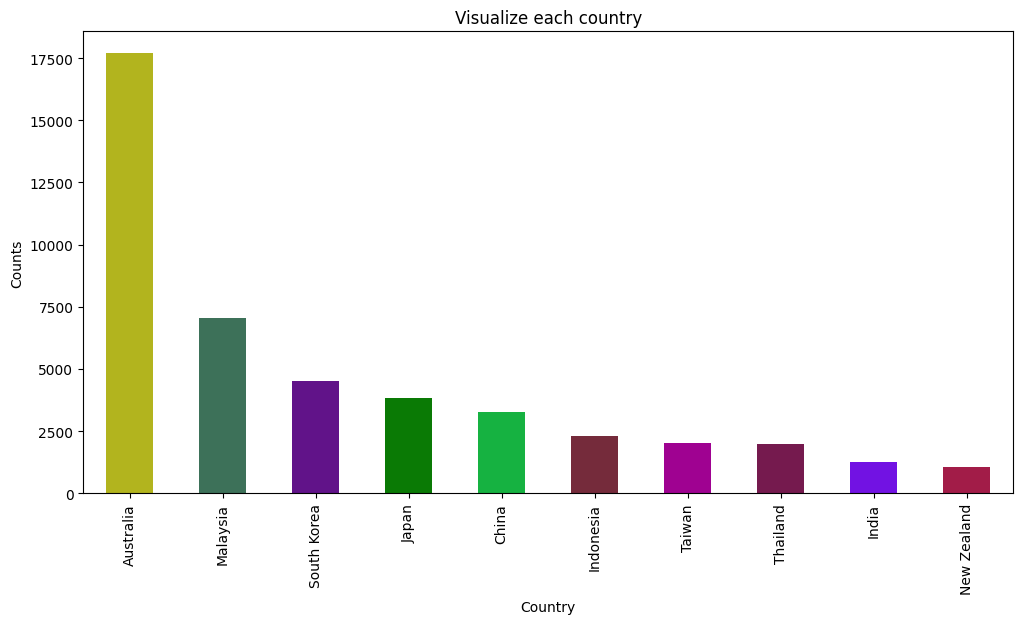

In [ ]:
# Plot a bar chart to show the top 10 most demanding origin
top_origins = df['booking_origin'].value_counts().nlargest(10)
top_origins.plot(kind='bar', figsize=(12, 6), color=generate_random_colors(len(top_origins)))
plt.title("Visualize each country")
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.ylabel("Counts")
plt.show()

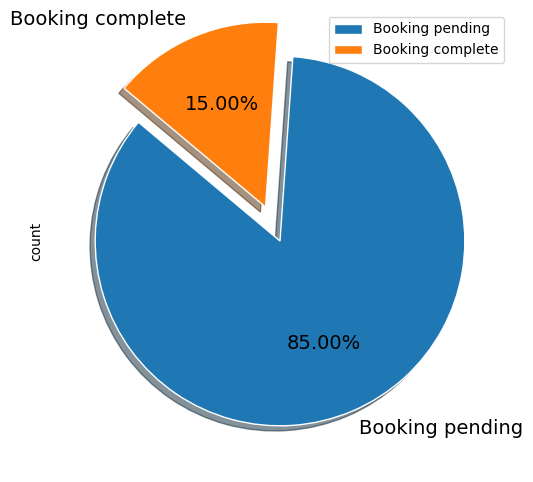

In [ ]:
df['booking_complete'].value_counts().plot(kind='pie',
                                           explode=[0, 0.2],
                                           labels = ["Booking pending", "Booking complete"],
                                           colors=['#1f77b4', '#ff7f0e'],
                                           fontsize=14,
                                           wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
                                           textprops={'fontsize': 14},
                                           legend=True,
                                           autopct='%1.2f%%',
                                           shadow=True,
                                           startangle=140,
                                           figsize=(12, 6))
plt.show()

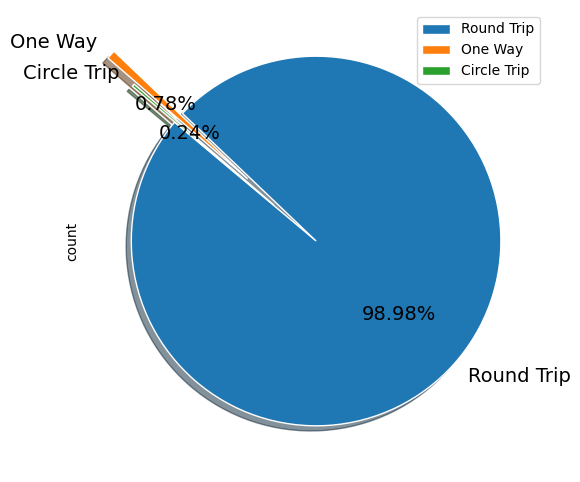

In [ ]:
df['trip_type'].value_counts().plot(kind='pie',
                                           explode=[0, 0.5, 0.3],
                                           labels = ["Round Trip", "One Way", "Circle Trip"],
                                           colors=['#1f77b4', '#ff7f0e', '#2ca02c'],
                                           fontsize=14,
                                           wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
                                           textprops={'fontsize': 14},
                                           legend=True,
                                           autopct='%1.2f%%',
                                           shadow=True,
                                           startangle=140,
                                           figsize=(12, 6))
plt.show()

In [ ]:
# Create dataframe for RoundTrip and  find which day most of the ticket
roundtrip = df[df['trip_type'] == 'RoundTrip']
roundtrip.groupby('flight_day')['booking_complete'].value_counts().sort_values(ascending=False).unstack()\
.style.background_gradient(cmap='Blues')

booking_complete,0,1
flight_day,,
Fri,5647,971
Mon,6724,1191
Sat,4809,853
Sun,5465,911
Thu,6151,1104
Tue,6350,1114
Wed,6267,1222


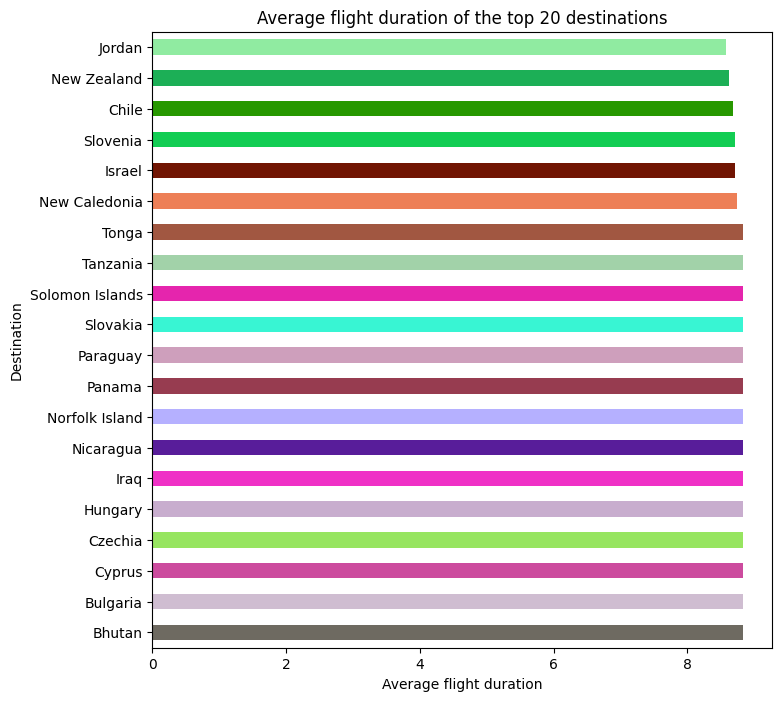

In [ ]:
# Find the average flight duration of the top 20 destinations
avg_flight = df.groupby('booking_origin')['flight_duration'].mean().nlargest(20)
avg_flight_colors = generate_random_colors(len(avg_flight))
avg_flight.plot(kind='barh', figsize=(8, 8), color=avg_flight_colors)
plt.title("Average flight duration of the top 20 destinations")
plt.xlabel("Average flight duration")
plt.ylabel("Destination")
plt.show()

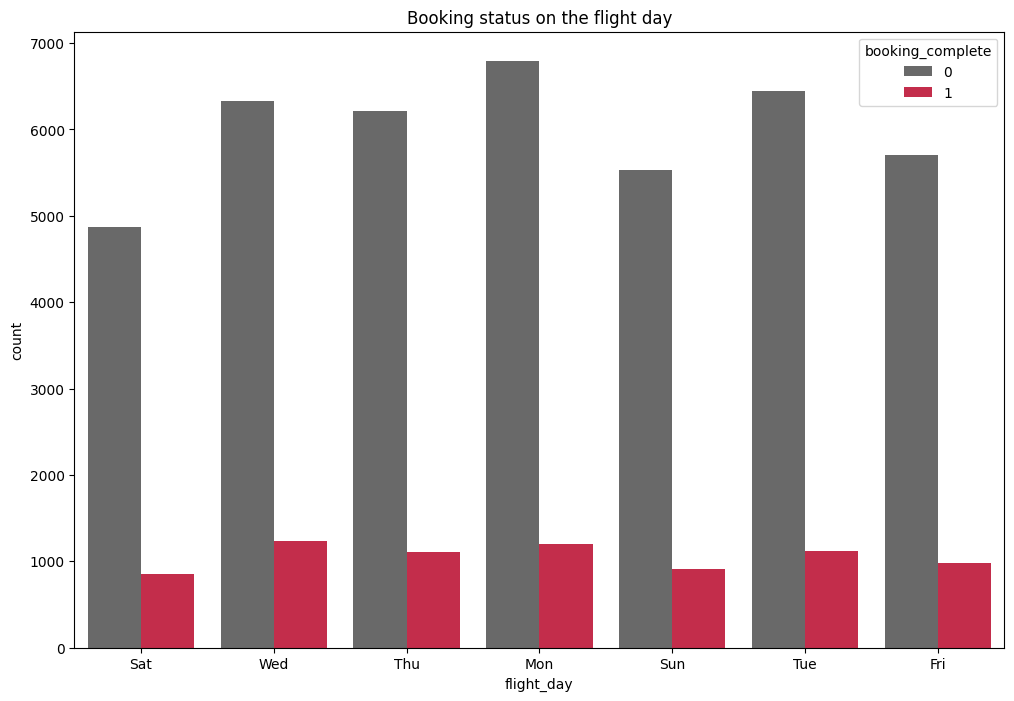

In [ ]:
# Create countplot to understand the booking status on the flight day
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='flight_day', hue='booking_complete', palette=['dimgrey', 'crimson'])
plt.title("Booking status on the flight day")
plt.show()

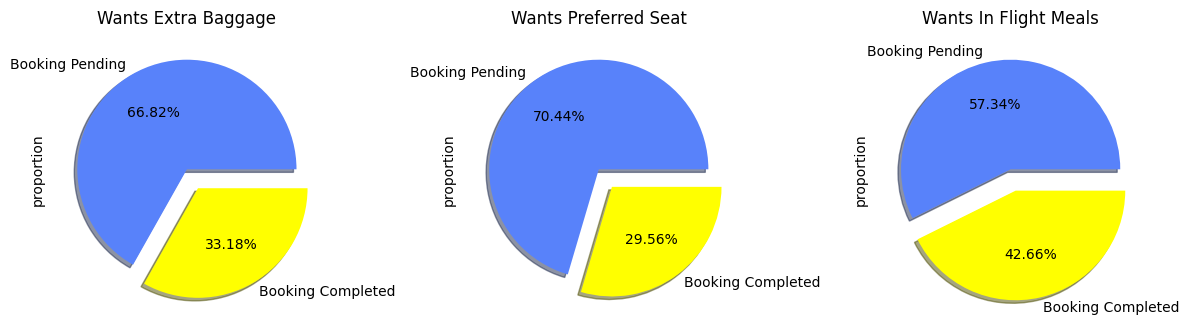

In [ ]:
#Create dataframe for the extra
data_plus = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']
plt.figure(figsize=(12, 8))
colors = ['#5882fa', '#ffff00']
explode = (0, 0.2)
autopct='%1.2f%%'S
shadow=True
for i, col in enumerate(data_plus):
    plt.subplot(1, 3, i+1)
    series = df[col].value_counts(normalize=True)
    series.plot(kind='pie', labels=['Booking Pending', 'Booking Completed'], colors=colors, autopct='%1.2f%%', shadow=True, explode=explode)
    plt.title(col.replace('_', ' ').title())
plt.tight_layout()
plt.show()

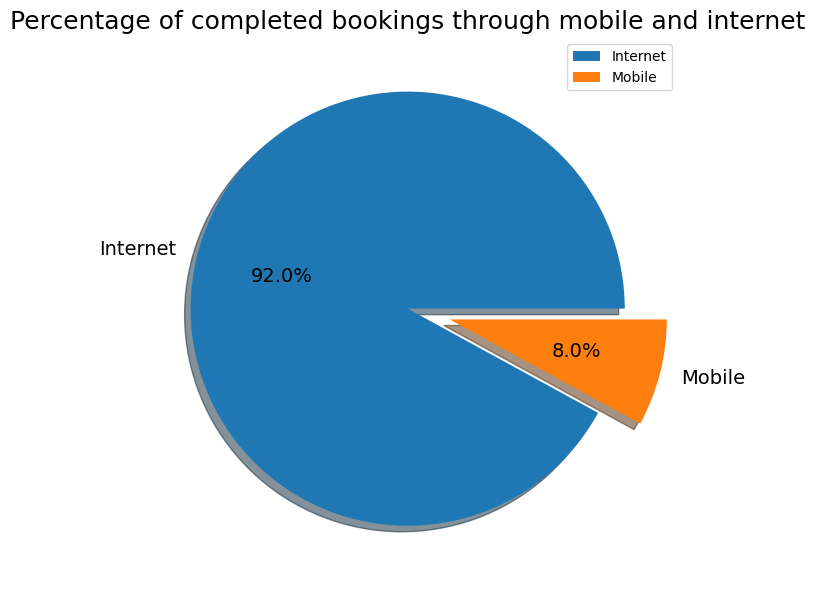

In [ ]:
# Compare % of completed bookings through mobile and internet
mobinet = df.groupby('sales_channel')['booking_complete'].sum()
plt.figure(figsize=(12, 6))
plt.pie(mobinet, labels=['Internet', 'Mobile'], colors=['#1f77b4', '#ff7f0e'],
        autopct='%1.1f%%',
        shadow=True,
        explode=[0, 0.2],
        textprops={'fontsize': 14})

plt.title("Percentage of completed bookings through mobile and internet", fontsize=18)
plt.tight_layout()
plt.legend()
plt.show()

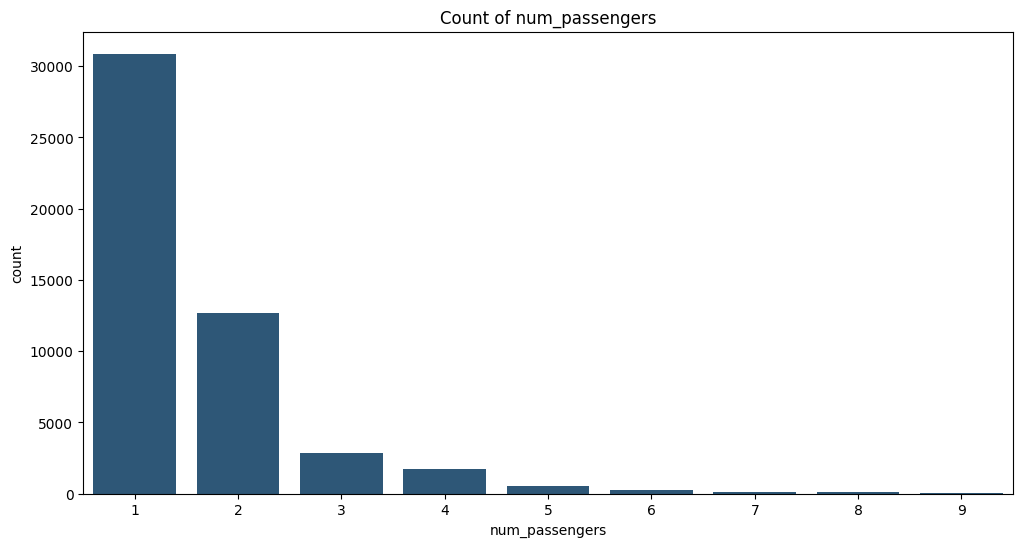

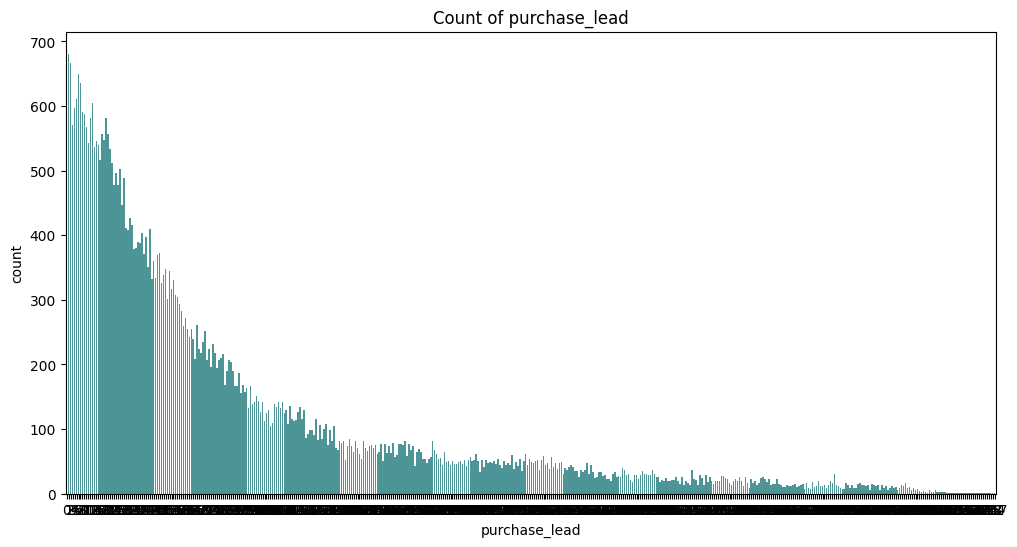

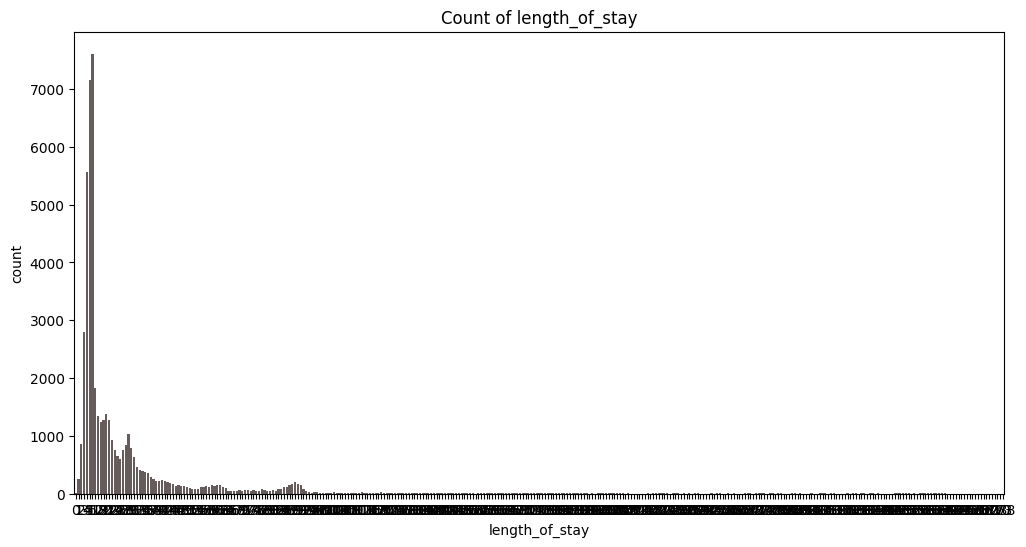

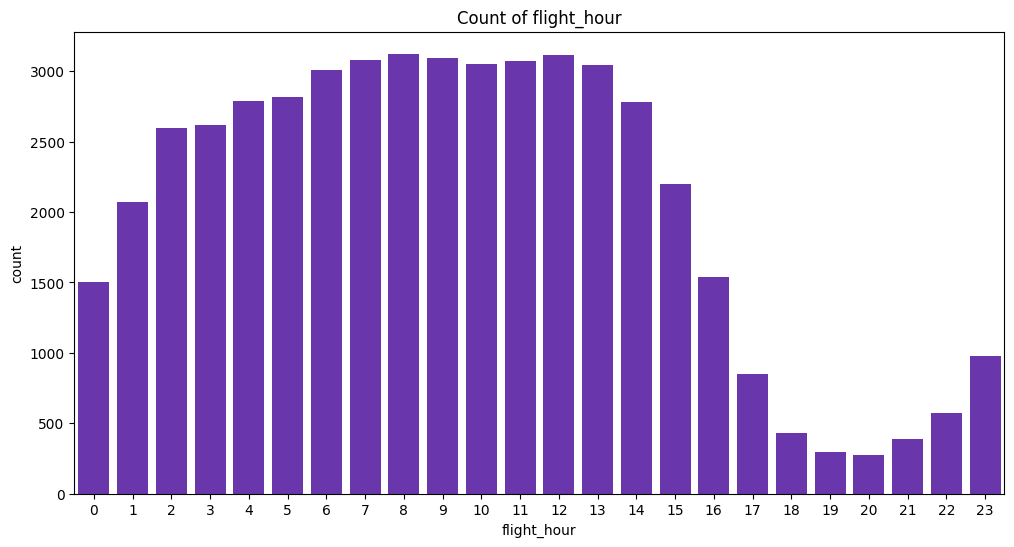

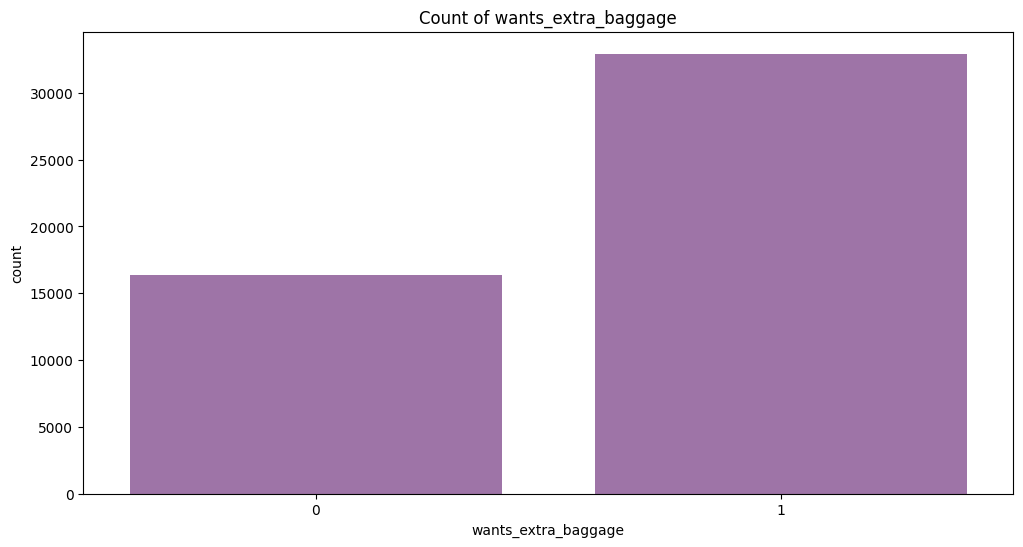

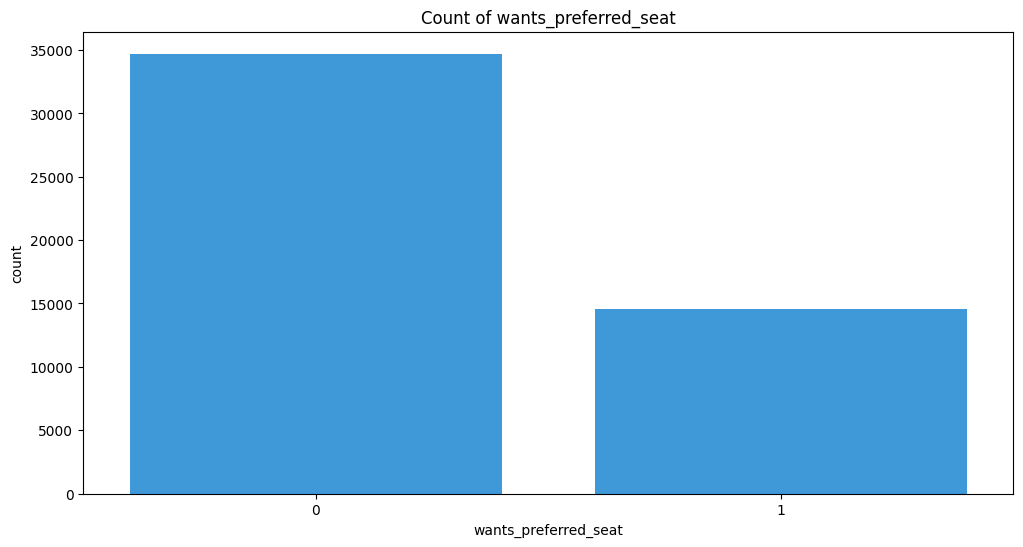

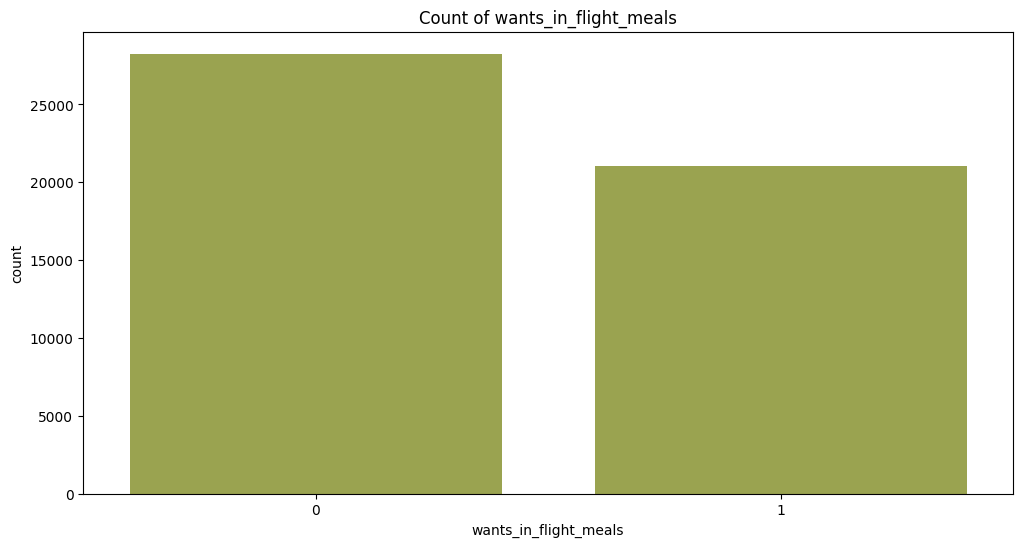

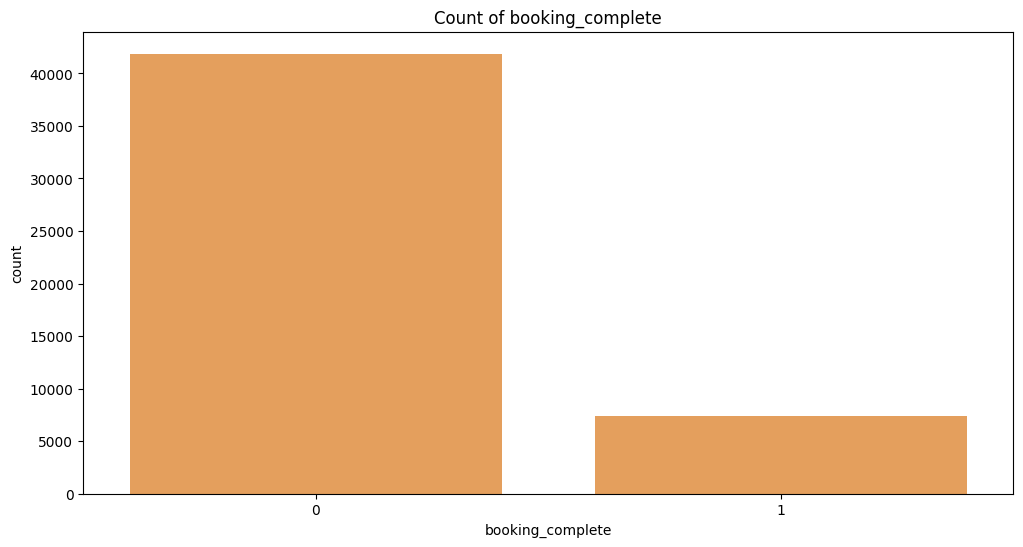

In [ ]:
# Create a countplot to understand the each values in data
for i in df.select_dtypes(include='int'):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=df[i], color=generate_random_colors(1)[0])
    plt.xlabel(f"{i}")
    plt.title(f"Count of {i}")
    plt.show()

In [ ]:
pd.pivot_table(df, index='booking_origin', columns='flight_day', values='booking_complete').style.background_gradient(cmap='icefire')

flight_day,Fri,Mon,Sat,Sun,Thu,Tue,Wed
booking_origin,,,,,,,
(not set),0.272727,0.000000,1.000000,0.166667,0.076923,0.076923,0.428571
Afghanistan,nan,nan,nan,nan,0.000000,nan,nan
Algeria,nan,nan,nan,nan,0.000000,nan,nan
Argentina,nan,0.000000,nan,nan,0.000000,0.000000,0.000000
Australia,0.043275,0.050264,0.053197,0.049311,0.054953,0.049869,0.052612
Austria,0.000000,0.000000,nan,0.000000,0.000000,nan,0.000000
Bahrain,nan,nan,0.500000,nan,0.666667,nan,nan
Bangladesh,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.200000
Belarus,0.000000,nan,nan,nan,nan,nan,nan


## Machine Learning Modeling

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
# Convert categorical columns to numeric
for col in df.select_dtypes(include='object').columns:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])

In [ ]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,2,720,4,1,0,1,5.62,0
49996,1,0,2,111,6,4,3,720,4,0,0,0,5.62,0
49997,1,0,2,24,6,22,2,720,4,0,0,1,5.62,0
49998,1,0,2,15,6,11,1,720,4,1,0,1,5.62,0


In [ ]:
# Divided the data into dependent and independent variables
X = df.drop(['booking_complete', 'route', 'purchase_lead'], axis=1)
y = df['booking_complete']

In [ ]:
#Scaling data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39424, 11), (9857, 11), (39424,), (9857,))

In [ ]:
# Create a function for machine learning model
def model_building(model, X_train, X_test, y_train, y_test):
    # Model accuracy and executed time
    print(f"Name of the model: {model.__class__.__name__}")

    start_train_time = time.time()
    model.fit(X_train, y_train)
    end_train_time = time.time()
    train_time = end_train_time - start_train_time

    start_test_time = time.time()
    y_pred = model.predict(X_test)
    end_test_time = time.time()
    test_time = end_test_time - start_test_time

    score = accuracy_score(y_test, y_pred)
    print(f"Accuracy score: {score} --- Training time: {train_time:.4f} seconds --- Testing time: {test_time:.4f} seconds")
    print('----' * 22)

     # Classification Report
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df = report_df[['precision', 'recall', 'f1-score', 'support']]
    styled_report = report_df.style.background_gradient(cmap='Blues').format(precision=2)
    print('Classification report:')
    display(styled_report)
    print('----' * 22)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
#Create all the models into dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

## **Evaluation**


### **Logistic Regression**

Name of the model: LogisticRegression
Accuracy score: 0.8499543471644516 --- Training time: 0.0551 seconds --- Testing time: 0.0008 seconds
----------------------------------------------------------------------------------------
Classification report:


,precision,recall,f1-score,support
0,0.85,1.00,0.92,8378.00
1,0.00,0.00,0.00,1479.00
accuracy,0.85,0.85,0.85,0.85
macro avg,0.42,0.50,0.46,9857.00
weighted avg,0.72,0.85,0.78,9857.00


----------------------------------------------------------------------------------------


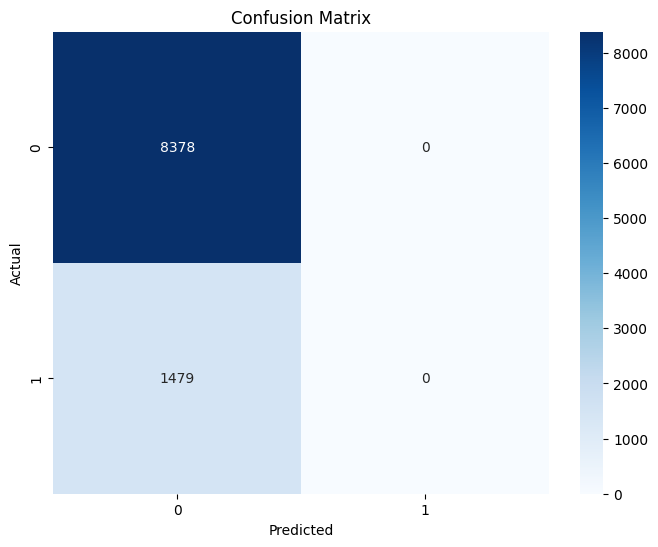

In [ ]:
logisticR_model = list(models.values())[0]
logit = list(models.keys())[0]
model_building(logisticR_model, X_train, X_test, y_train, y_test)

### **Decision Tree**

Name of the model: DecisionTreeClassifier
Accuracy score: 0.7735619356802272 --- Training time: 0.1934 seconds --- Testing time: 0.0037 seconds
----------------------------------------------------------------------------------------
Classification report:


,precision,recall,f1-score,support
0,0.87,0.86,0.87,8378.00
1,0.27,0.30,0.29,1479.00
accuracy,0.77,0.77,0.77,0.77
macro avg,0.57,0.58,0.58,9857.00
weighted avg,0.78,0.77,0.78,9857.00


----------------------------------------------------------------------------------------


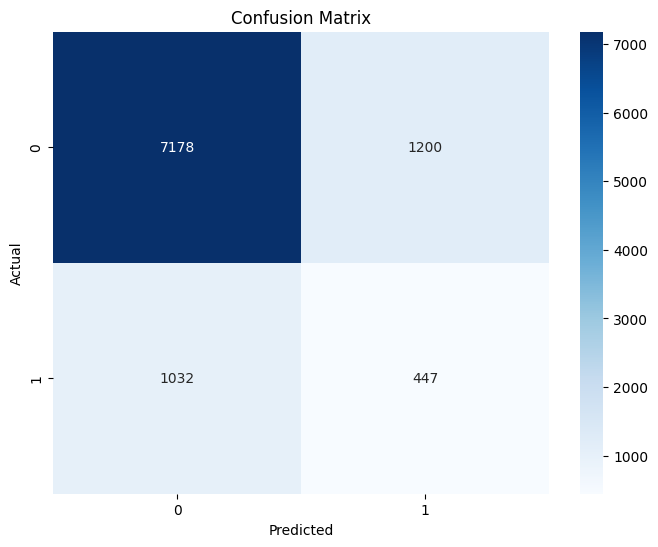

In [ ]:
tree_model = list(models.values())[1]
tree = list(models.keys())[1]
model_building(tree_model, X_train, X_test, y_train, y_test)

Name of the model: DecisionTreeClassifier
Accuracy score: 0.7720401744952825 --- Training time: 0.1974 seconds --- Testing time: 0.0037 seconds
----------------------------------------------------------------------------------------
Classification report:


,precision,recall,f1-score,support
0,0.87,0.86,0.86,8378.00
1,0.26,0.29,0.28,1479.00
accuracy,0.77,0.77,0.77,0.77
macro avg,0.57,0.57,0.57,9857.00
weighted avg,0.78,0.77,0.78,9857.00


----------------------------------------------------------------------------------------


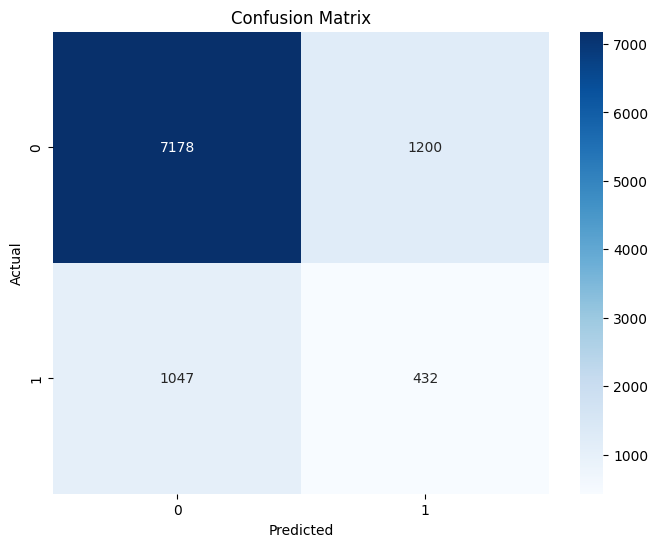

In [ ]:
tree_model = list(models.values())[1]
tree = list(models.keys())[1]
model_building(tree_model, X_train, X_test, y_train, y_test)

### **RandomForest**

Name of the model: RandomForestClassifier
Accuracy score: 0.8388962158871868 --- Training time: 3.7448 seconds --- Testing time: 0.2660 seconds
----------------------------------------------------------------------------------------
Classification report:


,precision,recall,f1-score,support
0,0.86,0.97,0.91,8378.00
1,0.38,0.11,0.17,1479.00
accuracy,0.84,0.84,0.84,0.84
macro avg,0.62,0.54,0.54,9857.00
weighted avg,0.79,0.84,0.80,9857.00


----------------------------------------------------------------------------------------


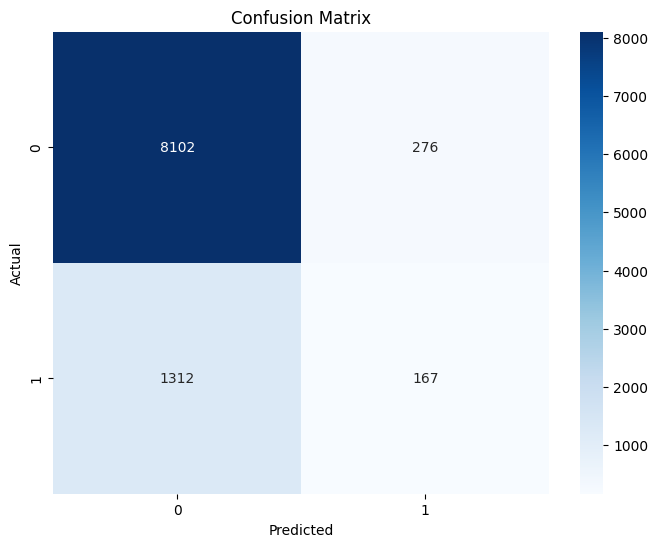

In [ ]:
forest_model = list(models.values())[2]
forest = list(models.keys())[2]
model_building(forest_model, X_train, X_test, y_train, y_test)

### **KNN**

Name of the model: KNeighborsClassifier
Accuracy score: 0.8337222278583748 --- Training time: 0.0700 seconds --- Testing time: 2.5062 seconds
----------------------------------------------------------------------------------------
Classification report:


,precision,recall,f1-score,support
0,0.86,0.96,0.91,8378.00
1,0.35,0.12,0.18,1479.00
accuracy,0.83,0.83,0.83,0.83
macro avg,0.60,0.54,0.54,9857.00
weighted avg,0.78,0.83,0.80,9857.00


----------------------------------------------------------------------------------------


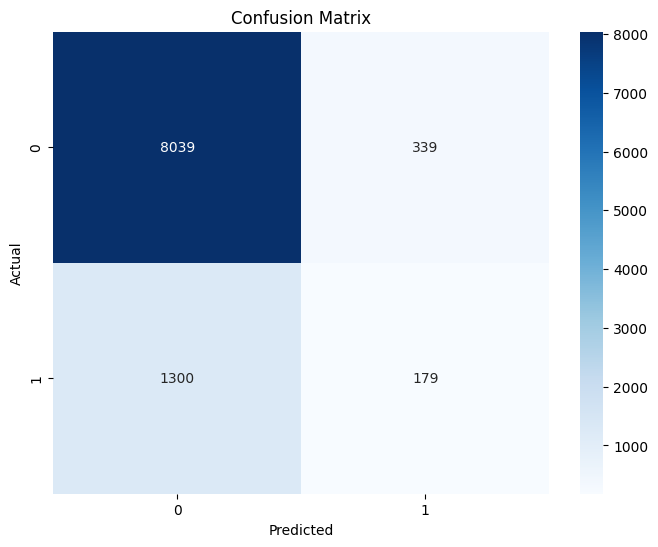

In [ ]:
knn_model = list(models.values())[3]
knn = list(models.keys())[3]
model_building(knn_model, X_train, X_test, y_train, y_test)

### **SVC**

Name of the model: SVC
Accuracy score: 0.8499543471644516 --- Training time: 287.7086 seconds --- Testing time: 10.5198 seconds
----------------------------------------------------------------------------------------
Classification report:


,precision,recall,f1-score,support
0,0.85,1.00,0.92,8378.00
1,0.00,0.00,0.00,1479.00
accuracy,0.85,0.85,0.85,0.85
macro avg,0.42,0.50,0.46,9857.00
weighted avg,0.72,0.85,0.78,9857.00


----------------------------------------------------------------------------------------


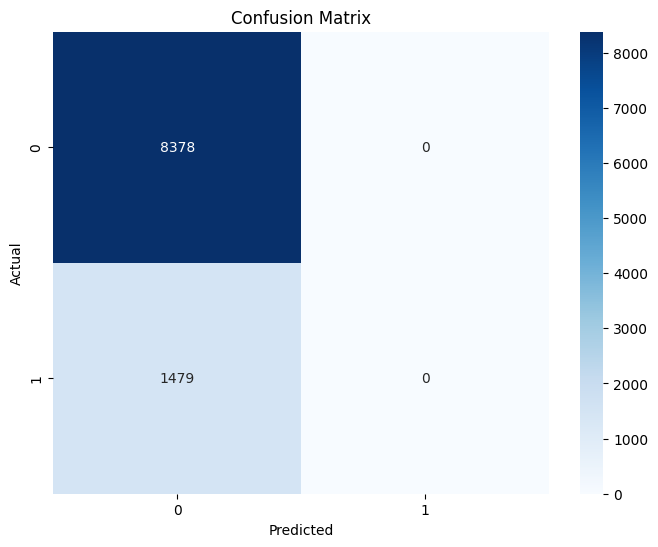

In [ ]:
svc_model = list(models.values())[4]
svc = list(models.keys())[4]
model_building(svc_model, X_train, X_test, y_train, y_test)

In [ ]:
# Construct evaluation table for all models
perfomance = {
    'Evaluation' : ['Precision', 'Recall', 'Training time (s)', 'Prediction time (s)'],
    'SVC' : [0.85, 1.00, 287.71, 10.52],
    'KNN' : [0.86, 0.96, 0.07, 2.51],
    'RandomForest' : [0.86, 0.87, 3.74, 0.27],
    'DecisionTree' : [0.87, 0.86, 0.19, 0.00],
    'LogisticRegression' : [0.85, 1, 0.06, 0.00],
}
df_perfomance = pd.DataFrame(perfomance)
df_perfomance.set_index('Evaluation', inplace=True)
df_perfomance

,SVC,KNN,RandomForest,DecisionTree,LogisticRegression
Evaluation,,,,,
Precision,0.85,0.86,0.86,0.87,0.85
Recall,1.00,0.96,0.87,0.86,1.00
Training time (s),287.71,0.07,3.74,0.19,0.06
Prediction time (s),10.52,2.51,0.27,0.00,0.00


In [ ]:
# Construct evaluation table for all models
perfomance = {
    'Model' : ['SVC', 'KNN', 'RandomForest', 'DecisionTree', 'LogisticRegression'],
    'Precision'          :[0.85, 0.86, 0.86, 0.87, 0.85],
    'Recall'             :[1, 0.96, 0.87, 0.86, 1],
    'Training_time_(s)'  :[287.71, 0.07, 3.74, 0.19, 0.06],
    'Prediction_time_(s)':[10.52, 2.51, 0.27, 0, 0],
}
df_perfomance = pd.DataFrame(perfomance)
df_perfomance.set_index('Model', inplace=True)
df_perfomance.style.background_gradient(cmap='Blues').format(precision=2)

,Precision,Recall,Training_time_(s),Prediction_time_(s)
Model,,,,
SVC,0.85,1.00,287.71,10.52
KNN,0.86,0.96,0.07,2.51
RandomForest,0.86,0.87,3.74,0.27
DecisionTree,0.87,0.86,0.19,0.00
LogisticRegression,0.85,1.00,0.06,0.00
